# Designing the FIR inverse filter

Lab 4, SDP

## 1 Obiectiv

Using the least-squares design method for finding the FIR approximation
of the inverse of a filter.

## 2 Theoretical notions

### The inverse filter

The inverse filter $H_I(z)$ of any given filter $H(z)$ is the system
that cancels the effect of $H(z)$ on a signal:
$$H_I \lbrace  H \lbrace x[n] \rbrace \rbrace \approx x[n]$$

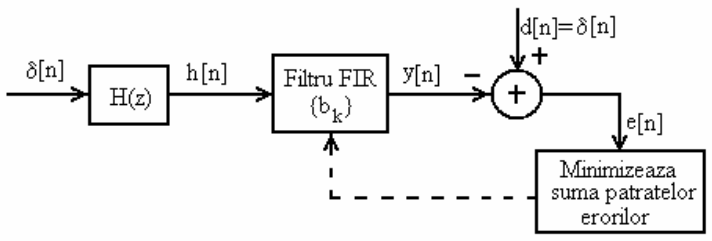

A direct solution is the inverse filter defined as:
$$H_I(z) = \frac{1}{H(z)}$$

Possible problems:

-   $H_I(z)$ is unstable if $H(z)$ has zeros outside the unit circle

Solution:

-   We search for an **FIR filter** that approximates the inverse filter
-   Being FIR, it is always stable
    $$H_I(z) = b_0 + b_1 z^{-1} + \dots + b_M z^{-N} \approx \frac{1}{H(z)}$$

### Designing the inverse FIR filter using the least squares method

Given a filter $H(z)$ with impulse response $h[n]$, the inverse FIR
filter $H_I(z) = b_0 + ... + b_Nz^{N}$ is obtained by solving the
following system (similar to the Prony method):

$$
\begin{bmatrix} 
h[0] \\ 
0 \\ 
\vdots \\ 
0 \\ 
\end{bmatrix}
=
\begin{bmatrix}
r_{hh}[0] & r_{hh}[-1] & \dots & r_{hh}[-N)] \\
r_{hh}[1] & r_{hh}[0] & \dots & r_{hh}[-N+1)] \\
\vdots & \dots & \dots & \vdots \\ 
r_{hh}[N] & r_{hh}[N-1] & \dots & r_{hh}[0] \\
\end{bmatrix}
\begin{bmatrix} 
b_0 \\ 
b_1 \\ 
\vdots \\ 
b_N \\ 
\end{bmatrix}
$$

The $r_{hh}$ values are the autocorrelation values of the signal $h[n]$.

### Design of the inverse FIR filter using the Prony method (variant)

We want to design a filter $H_I(z)$ such that: $$
\begin{aligned}
H(z) \cdot H_I(z) &\approx 1 \\
\frac{1}{H_I(z)} &\approx H(z) \\
\frac{1}{b_0 + b_1 z^{-1} + \dots + b_Nz^{-N}} &\approx H(z) \\
\frac{1/b_0}{1 + b_1/b_0 z^{-1} + \dots + b_N/b_0 z^{-N}} &\approx H(z) \\
\end{aligned}
$$

The above relation, expressed in the time domain::
$$h_I[n] \approx \underbrace{h[n]}_{h_d[n]} $$

We want to design a filter of the form
$$\frac{1/b_0}{1 + b_1/b_0 z^{-1} + \dots + b_N/b_0 z^{-N}}$$ whose
impulse response $h_I[n]$ approximates the impulse response of the
original filter, $h[n]$.

We can use the Prony method for this purpose, with degree of numerator
equal to $0$ and degree of denominator equal to $N$.

Solution using the Prony method:

1.  Design a filter $\frac{b_0'}{1 + a_1' z^{-1} + \dots + a_N' z^{-N}}$
    that approximates the desired impulse response = impulse response of
    the original filter, $h_d[n] = h[n]$

2.  After obtaining the coefficients, we force simplify by $b_0'$ (the
    numerator coefficient)

3.  The resulting denominator,
    $1/b_0' + a_1'/b_0' z^{-1} + \dots + a_N'/b_0' z^{-M}$, is the
    system function of the obtained inverse FIR filter
    $$H_I(z) = 1/b_0' + a_1'/b_0' z^{-1} + \dots + a_N'/b_0' z^{-N} = b_0 + b_1 z^{-1} + \dots + b_Nz^{-N}$$

## 3 Theoretical Exercise

1.  Use the least squares method to find the inverse FIR filter of order
    2 for the following filter: $$H(z) = 0.2 + 0.8 z^{-1} + 0.2 z^{-2}$$

## 4 Practical Exercises

1.  Solve numerically in Matlab the system of equations corresponding to
    the design of the inverse FIR filter from the theoretical exercise,
    using the `linsolve()` function.

2.  Implement in Matlab a general function that designs the inverse FIR
    filter for any order and any impulse response $h[n]$:

    ``` matlab
    function b = inversefir(order, h)
    ...
    end
    ```

    The function will receive the following arguments:

    -   `order`: the desired order of the filter
    -   `hd`: a vector with the impulse response of the original filter
        (as long as possible)

    The function will return the coefficients of the system function of
    the designed FIR filter (only the numerator coefficients, since it
    is FIR):

    -   `b`: the numerator coefficients

3.  Verification: use the above function to find the inverse FIR filter
    of the filter from the theoretical exercise:
    $$H(z) = 0.2 + 0.8 z^{-1} + 0.2 z^{-2}$$

    Note: for FIR filters, the impulse response has the same values as
    the coefficients of $H(z)$.

4.  Use the function above to find the inverse FIR filter for the
    following two filters:
    $$H_1(z) = \frac{1}{1 + 0.1 z^{-1} - 0.3 z^{-2}}$$
    $$H_2(z) = \frac{3}{1 + 0.1 z^{-1} - 0.3 z^{-2}}$$

    You should first call `impz()` and generate a sufficiently long
    impulse response of these filters (e.g. 100 samples).

5.  Load an audio signal into Matlab and filter it with $H(z)$, then
    with its inverse. How does each signal sound?

## 5 Final Questions

1.  TBD